<a href="https://www.peqnp.com"><img border="0" alt="PEQNP" src="https://raw.githubusercontent.com/maxtuno/SATX/main/SAT-X.jpg" width="640" height="400">

# SAT-X 
## [![Downloads](https://pepy.tech/badge/satx)](https://pepy.tech/project/satx) 
### The constraint modeling language for SAT solvers

SAT-X is a language for constrained optimization and decision problems over positive integers, that work with any SAT Competition standard SAT solver. Is based on Python, and is ase to learn and easy to use with all technologies associated to this language.

# Some excelent SAT Solvers

1- https://github.com/maxtuno/SLIME (standalone and cloud [MPI] - Oscar Riveros)

2- https://github.com/arminbiere/kissat (The Kissat SAT Solver - Armin Biere)

3- https://github.com/maxtuno/MiniSat (MiniSat 2.2.0 with DRUP proof, CMake and StarExec Ready. -  Niklas Een, Niklas Sorensson)

4- https://github.com/maxtuno/blue (A Powerful SAT Solver for Java - Oscar Riveros)

5- Any SAT Solver with the SAT Competition standars. (http://www.satcompetition.org)

# INSTALLATION
```python
pip install SATX
```

In [1]:
!pip install SATX --upgrade --force

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for SATX: filename=SATX-0.3.8-py3-none-any.whl size=19759 sha256=7a21834123b53ee86be2cbc87952b127946258c032abc215a867cfa7e6d007be
  Stored in directory: /root/.cache/pip/wheels/fb/9d/c6/d1e341c25818751e339bc9d50be85a676f42b8241fc0aaf314
Successfully built SATX


# INTRODUCION
On SAT-X all elements are integers, the relations are at bit level or arithmetic level. All integers live on $\mathbb{N}_{2 ^ {bits} - 1}$ and always positives, i.e. for two integer $(x, y)$ the operation, $(x - y)$ take all possibilities such that $x - y >= 0$.

# SUPPORTED OPERATIONS
$+$, $-$, $*$, $/$, $**$, $abs$, $powmod$, $\%$, $\&$, $|$, $^$, $==$, $=$, $<$, $<=$, $>$, $>=$

# FIND ALL SOLUTIONS TO $2^n-7=x^2$

Ref: http://www.artofproblemsolving.com/Forum/viewtopic.php?t=66245

In [5]:
import satx

satx.engine(bits=16, cnf_path='tmp.cnf')

_2 = satx.constant(2)
n = satx.integer()
x = satx.integer()

assert _2 ** n - 7 == x ** 2

while satx.satisfy(solver='./slime', log=False):
    print(n, x)

5 5
4 3
7 11
3 1


SOLVE IN POSITIVE INTEGERS THE FOLLOWING EQUATION: $n^3 − 5n + 10 = 2^k$.

Ref: http://www.artofproblemsolving.com/Forum/viewtopic.php?t=103239

tip: avoid the negative signs

In [6]:
import satx

satx.engine(bits=16, cnf_path='tmp.cnf')

_2 = satx.constant(2)

n = satx.integer()
k = satx.integer()

assert n ** 3 + 10 == _2 ** k + 5 * n

while satx.satisfy(solver='./slime', log=False):
    print(n, k)

2 3


# FIND ALL POSITIVE INTEGER SOLUTIONS TO $a^{2}=b^{3}+1$

Ref: http://www.artofproblemsolving.com/Forum/viewtopic.php?t=103239

In [8]:
import satx

satx.engine(bits=16, cnf_path='tmp.cnf')

a = satx.integer()
b = satx.integer()

assert a ** 2 == b ** 3 + 1

while satx.satisfy(solver='./slime', log=False):
    print(a, b)

3 2
1 0


# FIND ALL POSITIVE INTEGER SOLUTIONS TO  $x,y$: $3^x - 1 == y2^x + 1$

ref: http://www.artofproblemsolving.com/Forum/viewtopic.php?t=31947

In [12]:
import satx

satx.engine(bits=16, cnf_path='tmp.cnf')

_2 = satx.constant(2)
_3 = satx.constant(3)

x = satx.integer()
y = satx.integer()

assert _3 ** x == y * _2 ** x + 1

while satx.satisfy(solver='./slime', log=False):
    print(x, y)

2 2
4 5
1 1


# INTEGER FACTORIZATION
In number theory, integer factorization is the decomposition of a composite number into a product of smaller integers. If these factors are further restricted to prime numbers, the process is called prime factorization.

In [14]:
import satx

rsa = 3007

satx.engine(bits=rsa.bit_length(), cnf_path='tmp.cnf')

p = satx.integer()
q = satx.integer()

assert p * q == rsa

while satx.satisfy(solver='./slime', log=False):
    print(p, q)

3007 1
31 97
1 3007
97 31


# PALINDROMIC NUMBERS (Bits Level)

In [16]:
import numpy as np
import satx

satx.engine(bits=10, cnf_path='tmp.cnf')

x = satx.integer()

# without "copy" for inplace reverse of bits
assert x == x.reverse(copy=True)

while satx.satisfy(solver='./slime', log=False):
    print(x, np.binary_repr(x.value, satx.bits()))

0 0000000000
132 0010000100
72 0001001000
258 0100000010
513 1000000001
48 0000110000
204 0011001100
771 1100000011
120 0001111000
390 0110000110
561 1000110001
180 0010110100
330 0101001010
645 1010000101
585 1001001001
306 0100110010
462 0111001110
693 1010110101
633 1001111001
819 1100110011
252 0011111100
843 1101001011
438 0110110110
717 1011001101
378 0101111010
903 1110000111
975 1111001111
510 0111111110
765 1011111101
891 1101111011
951 1110110111
1023 1111111111


# XOR Problem

The XOr, or “exclusive or”, problem is a classic problem in ANN research. It is the problem of using a neural network to predict the outputs of XOr logic gates given two binary inputs. An XOr function should return a true value if the two inputs are not equal and a false value if they are equal.

In [17]:
import satx

x = [[0, 0], [0, 1], [1, 0], [1, 1]]
y = [0, 1, 1, 0]

n, m = len(x), len(x[0])

satx.engine(bits=10, cnf_path='tmp.cnf')

w = satx.matrix(dimensions=(n, m))
b = satx.vector(size=n)

for i in range(n):
    assert y[i] == satx.dot(x[i], w[i]) + b[i]

if satx.satisfy(solver='./slime', log=False):
    for i in range(n):
        print(x[i], satx.dot(x[i], w[i]) + b[i])
else:
    print('Infeasible ...')

[0, 0] 0
[0, 1] 1
[1, 0] 1
[1, 1] 0


# ABSOLUTE VALUES

In [18]:
import satx

satx.engine(bits=4, cnf_path='tmp.cnf')

x = satx.integer()
y = satx.integer()

assert abs(x - y) == 1

assert x != satx.oo()
assert y != satx.oo()

while satx.satisfy(solver='./slime', log=False):
    print(x, y, x - y, abs(x - y))

8 9 -1 1
12 13 -1 1
4 5 -1 1
10 9 1 1
2 1 1 1
14 13 1 1
6 5 1 1
9 8 1 1
13 12 1 1
5 4 1 1
8 7 1 1
12 11 1 1
4 3 1 1
11 10 1 1
10 11 -1 1
2 3 -1 1
14 15 -1 1
6 7 -1 1
9 10 -1 1
13 14 -1 1
5 6 -1 1
1 2 -1 1
7 8 -1 1
3 2 1 1
3 4 -1 1
15 14 1 1
7 6 1 1
11 12 -1 1


# CENTROID

4 7


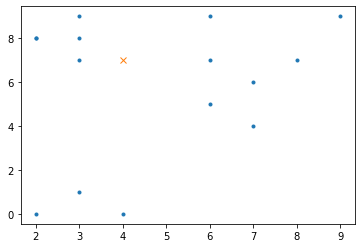

In [19]:
import numpy as np
import satx
import matplotlib.pyplot as plt

n = 15

data = np.random.randint(0, 10, size=(n, 2))

opt = 1
while True:
    satx.engine(bits=10, cnf_path='tmp.cnf')

    x = satx.integer()
    y = satx.integer()

    assert sum(abs(xy[0] - x) + abs(xy[1] - y) for xy in data) < opt
    
    assert x != satx.oo()
    assert y != satx.oo()

    if satx.satisfy(solver='./slime', log=False):        
        print(x, y)
        a, b = zip(*data)
        plt.plot(a, b, '.')
        plt.plot(x, y, 'x')
        plt.show()
        break
    else:
        opt += 1

# FERMAT'S FACTORIZATION METHOD

Note: when there is a negative number in the model, increment the bits by 1.

In [20]:
import satx

rsa = 3007

satx.engine(bits=rsa.bit_length() + 1, cnf_path='tmp.cnf')

p = satx.integer()
q = satx.integer()

assert p ** 2 - q ** 2 == rsa
assert q < p

if satx.satisfy(solver='./slime', log=True):
    print(p, q, p + q, p - q)
else:
    print('Is Prime!')

c                                         
c   ██████  ██▓     ██▓ ███▄ ▄███▓▓█████  
c ▒██    ▒ ▓██▒    ▓██▒▓██▒▀█▀ ██▒▓█   ▀  
c ░ ▓██▄   ▒██░    ▒██▒▓██    ▓██░▒███    
c   ▒   ██▒▒██░    ░██░▒██    ▒██ ▒▓█  ▄  
c ▒██████▒▒░██████▒░██░▒██▒   ░██▒░▒████▒ 
c ▒ ▒▓▒ ▒ ░░ ▒░▓  ░░▓  ░ ▒░   ░  ░░░ ▒░ ░ 
c ░ ░▒  ░ ░░ ░ ▒  ░ ▒ ░░  ░      ░ ░ ░  ░ 
c ░  ░  ░    ░ ░    ▒ ░░      ░      ░    
c       ░      ░  ░ ░         ░      ░  ░ 
c                                         
c       https://twitter.com/maxtuno       
c                                         
c                [GRAVITY]                
c                                         
c Reduced to 306 vars, 1526 cls (grow=0)
c Reduced to 305 vars, 1527 cls (grow=1)
c Reduced to 303 vars, 1527 cls (grow=2)
c Reduced to 289 vars, 1555 cls (grow=3)
c No. effective iterative eliminations: 3
c 33.26% (-)                             
c 25.00% (-)                             
c 22.08% (-)                             
c 21.39% (-)           

# EXPONENTIAL DIOPHANTINE EQUATIONS


In [24]:
import satx

satx.engine(bits=16, deep=4, cnf_path='tmp.cnf')

x = satx.integer()
y = satx.integer()
z = satx.integer()

satx.apply_single([x, y, z], lambda t: t != 0)

assert x ** y == z

while satx.satisfy(solver='./slime', log=False):
    print(x, y, z)

2 4 16
1 4 1
1 2 1
4 3 64
4 2 16
4 4 256
4 1 4
8 1 8
8 2 64
8 4 4096
15 1 15
1 1 1
3 1 3
3 2 9
1 3 1
6 3 216
2 1 2
8 3 512
9 4 6561
9 3 729
9 1 9
9 2 81
10 2 100
10 4 10000
10 3 1000
10 1 10
2 3 8
2 2 4
3 4 81
3 3 27
11 1 11
11 4 14641
11 2 121
11 3 1331
5 3 125
5 4 625
5 1 5
5 2 25
7 3 343
15 3 3375
13 3 2197
13 4 28561
13 1 13
13 2 169
14 3 2744
14 4 38416
14 1 14
14 2 196
15 2 225
15 4 50625
7 4 2401
7 2 49
6 4 1296
6 2 36
6 1 6
7 1 7
12 4 20736
12 3 1728
12 2 144
12 1 12


# ON THE DIOPHANTINE EQUATION $x^2 + c = 3^n$ WITH $x, c, n > 1$

In [25]:
import satx

n = 32

satx.engine(bits=n.bit_length(), cnf_path='tmp.cnf')

_3 = satx.constant(3)
n = satx.integer()
x = satx.integer()
c = satx.integer()

assert x ** 2 + c == _3 ** n
assert x > 1
assert c > 1
assert n > 1

if satx.satisfy(solver='./slime', log=True):
    print(n, x, c)
else:
    print('Infeasible for bit range...')

c                                         
c   ██████  ██▓     ██▓ ███▄ ▄███▓▓█████  
c ▒██    ▒ ▓██▒    ▓██▒▓██▒▀█▀ ██▒▓█   ▀  
c ░ ▓██▄   ▒██░    ▒██▒▓██    ▓██░▒███    
c   ▒   ██▒▒██░    ░██░▒██    ▒██ ▒▓█  ▄  
c ▒██████▒▒░██████▒░██░▒██▒   ░██▒░▒████▒ 
c ▒ ▒▓▒ ▒ ░░ ▒░▓  ░░▓  ░ ▒░   ░  ░░░ ▒░ ░ 
c ░ ░▒  ░ ░░ ░ ▒  ░ ▒ ░░  ░      ░ ░ ░  ░ 
c ░  ░  ░    ░ ░    ▒ ░░      ░      ░    
c       ░      ░  ░ ░         ░      ░  ░ 
c                                         
c       https://twitter.com/maxtuno       
c                                         
c                [GRAVITY]                
c                                         
c Reduced to 56 vars, 240 cls (grow=0)
c Reduced to 22 vars, 88 cls (grow=1)
c Reduced to 14 vars, 62 cls (grow=2)
c No. effective iterative eliminations: 2
c LS!                
s SATISFIABLE
v -1 2 3 -4 -5 -6 -7 8 9 -10 -11 -12 -13 14 -15 16 -17 -18 -19 -20 21 -22 -23 -24 -25 26 -27 -28 -29 -30 -31 32 -33 34 -35 -36 -37 -38 39 -40 -41 -42 -43 -44 -45 

# FACTORIALS

In [26]:
import math
import satx

satx.engine(bits=32, cnf_path='tmp.cnf')

x = satx.integer()

satx.factorial(x) == math.factorial(10)

if satx.satisfy(solver='./slime', log=True):
    print(x)
else:
    print('Need more bits!')

c                                         
c   ██████  ██▓     ██▓ ███▄ ▄███▓▓█████  
c ▒██    ▒ ▓██▒    ▓██▒▓██▒▀█▀ ██▒▓█   ▀  
c ░ ▓██▄   ▒██░    ▒██▒▓██    ▓██░▒███    
c   ▒   ██▒▒██░    ░██░▒██    ▒██ ▒▓█  ▄  
c ▒██████▒▒░██████▒░██░▒██▒   ░██▒░▒████▒ 
c ▒ ▒▓▒ ▒ ░░ ▒░▓  ░░▓  ░ ▒░   ░  ░░░ ▒░ ░ 
c ░ ░▒  ░ ░░ ░ ▒  ░ ▒ ░░  ░      ░ ░ ░  ░ 
c ░  ░  ░    ░ ░    ▒ ░░      ░      ░    
c       ░      ░  ░ ░         ░      ░  ░ 
c                                         
c       https://twitter.com/maxtuno       
c                                         
c                [GRAVITY]                
c                                         
c Reduced to 708281 vars, 4076191 cls (grow=0)
c Reduced to 707546 vars, 4076190 cls (grow=1)
c Reduced to 707537 vars, 4076198 cls (grow=2)
c Reduced to 680765 vars, 4124958 cls (grow=3)
c Reduced to 680604 vars, 4125388 cls (grow=4)
c Reduced to 680346 vars, 4121852 cls (grow=5)
c Reduced to 678989 vars, 4124090 cls (grow=6)
c Reduced to 677332 vars, 

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



10


# $\Sigma$

In [27]:
import satx

satx.engine(bits=16, cnf_path='tmp.cnf')

x = satx.integer()
n = satx.integer()

satx.sigma(lambda k: k ** 2, 1, n) == x

while satx.satisfy(solver='./slime', log=False):
    print(x, n, sum(k ** 2 for k in range(1, n.value + 1)))


0 0 0
385 10 385
140 7 140
14 3 14
91 6 91
204 8 204
55 5 55
30 4 30
819 13 819
506 11 506
285 9 285
1015 14 1015
650 12 650
1 1 1
5 2 5


# $\Pi$

In [ ]:
import functools
import operator
import math
import satx

satx.engine(bits=32, cnf_path='tmp.cnf')

x = satx.integer()
n = satx.integer()

satx.pi(lambda k: k ** 2, 1, n) == x
assert 0 < x <= 2 ** math.log(satx.oo()) # limit the CNF overflow
assert n > 0

while satx.satisfy(solver='./slime', log=False):
    print(x, n, functools.reduce(operator.mul, (k ** 2 for k in range(1, n.value + 1))))

4 2 4
576 4 576
518400 6 518400
14400 5 14400
1 1 1
36 3 36


# SAT-X VS FIBONACCI NUMBERS | N VS TIME

2 1
3 2
4 3
5 5
6 8
7 13
8 21
9 34
10 55
11 89
12 144
13 233
14 377
15 610
16 987
17 1597
18 2584
19 4181
20 6765
21 10946
22 17711
23 28657
24 46368
25 75025
26 121393
27 196418
28 317811
29 514229
30 832040
31 1346269
32 2178309
33 3524578
34 5702887
35 9227465
36 14930352
37 24157817
38 39088169
39 63245986
40 102334155
41 165580141
42 267914296
43 433494437
44 701408733
45 1134903170
46 1836311903
47 2971215073
48 4807526976
49 7778742049
50 12586269025
51 20365011074
52 32951280099
53 53316291173
54 86267571272
55 139583862445
56 225851433717
57 365435296162
58 591286729879
59 956722026041
60 1548008755920
61 2504730781961
62 4052739537881
63 6557470319842
64 10610209857723
65 17167680177565
66 27777890035288
67 44945570212853
68 72723460248141
69 117669030460994
70 190392490709135
71 308061521170129
72 498454011879264
73 806515533049393
74 1304969544928657
75 2111485077978050
76 3416454622906707
77 5527939700884757
78 8944394323791464
79 14472334024676221
80 23416728348467685
81 

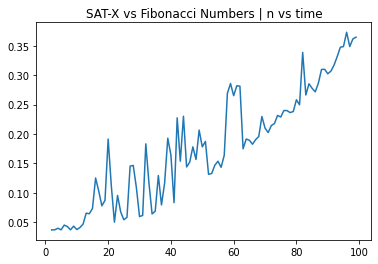

In [28]:
import time
import satx
import matplotlib.pyplot as plt

ns, ts = [], []
for n in range(2, 100):

    satx.engine(bits=n, cnf_path='tmp.cnf')

    x = satx.vector(size=n + 1)

    assert x[0] == 0
    assert x[1] == 1
    for i in range(2, n + 1):
        assert x[i - 1] + x[i - 2] == x[i]

    ini = time.time()
    if satx.satisfy(solver='./slime', log=False):
        print(n, x[n])
    else:
        print('Infeasible ...')
    end = time.time()
    ns.append(n)
    ts.append(end - ini)

plt.title('SAT-X vs Fibonacci Numbers | n vs time')
plt.plot(ns, ts)
plt.show()

# TENSORS

Tensors object are the most advanced concept behind SAT-X, integers are tensors, work like integers, but their bits act like an multidimensional matrix of lambda functions.

Note: [[*]] for acces to lambda (bit) functions.

In [29]:
import satx

satx.engine(bits=10, cnf_path='tmp.cnf')

x = satx.tensor(dimensions=(4))
y = satx.tensor(dimensions=(2, 2))

assert x + y == 10
assert x[[0]](0, 1) == 1
assert y[[0, 0]](0, 1) == 1

while satx.satisfy(solver='slime', log=False):
    print(x, y, x.binary, y.binary)

In [30]:
import numpy as np
import satx

n = 2

satx.engine(bits=4, cnf_path='tmp.cnf')

x = satx.tensor(dimensions=(n, n))
a = satx.integer()
b = satx.integer()

assert sum(x[[i, j]](a ** 2 - b ** 3, a ** 3 - b ** 2) for i in range(n) for j in range(n)) == 0

while satx.satisfy(solver='slime', log=False):
    print(a, b)
    print(np.vectorize(int)(x.binary))
    print()

# RSA FACTORIZATION WITH TENSORS

In [31]:
import satx

rsa = 3007

satx.engine(bits=rsa.bit_length(), cnf_path='tmp.cnf')

p = satx.tensor(dimensions=(satx.bits()))
q = satx.tensor(dimensions=(satx.bits()))

assert p * q == rsa
assert p[[0]](0, 1) == 1
assert q[[0]](0, 1) == 1
assert sum(p[[i]](0, 1) for i in range(satx.bits() // 2 + 1, satx.bits())) == 0
assert sum(q[[i]](0, 1) for i in range(satx.bits() // 2, satx.bits())) == 0

if satx.satisfy(solver='./slime', log=True):
    print(p, q)
else:
    print('Is Prime!')

c                                         
c   ██████  ██▓     ██▓ ███▄ ▄███▓▓█████  
c ▒██    ▒ ▓██▒    ▓██▒▓██▒▀█▀ ██▒▓█   ▀  
c ░ ▓██▄   ▒██░    ▒██▒▓██    ▓██░▒███    
c   ▒   ██▒▒██░    ░██░▒██    ▒██ ▒▓█  ▄  
c ▒██████▒▒░██████▒░██░▒██▒   ░██▒░▒████▒ 
c ▒ ▒▓▒ ▒ ░░ ▒░▓  ░░▓  ░ ▒░   ░  ░░░ ▒░ ░ 
c ░ ░▒  ░ ░░ ░ ▒  ░ ▒ ░░  ░      ░ ░ ░  ░ 
c ░  ░  ░    ░ ░    ▒ ░░      ░      ░    
c       ░      ░  ░ ░         ░      ░  ░ 
c                                         
c       https://twitter.com/maxtuno       
c                                         
c                [GRAVITY]                
c                                         
c Reduced to 95 vars, 455 cls (grow=0)
c Reduced to 93 vars, 453 cls (grow=1)
c Reduced to 91 vars, 454 cls (grow=2)
c Reduced to 87 vars, 462 cls (grow=3)
c No. effective iterative eliminations: 3
c LS!                
s SATISFIABLE
v -1 2 -3 -4 -5 -6 7 8 -9 -10 -11 -12 -13 14 15 16 17 18 -19 -20 -21 -22 -23 -24 -25 26 27 28 29 30 31 -32 33 34 35 -36 3

# SAT REFORMULATION WITH TENSORS

In [32]:
import functools
import operator
import sys

import satx


n, m, sat = 10, 24, [[9, -5, 10, -6, 3],
                     [6, 8],
                     [8, 4],
                     [-10, 5],
                     [-9, 8],
                     [-9, -3],
                     [-2, 5],
                     [6, 4],
                     [-2, -1],
                     [7, -2],
                     [-9, 4],
                     [-1, -10],
                     [-3, 4],
                     [7, 5],
                     [6, -3],
                     [-10, 7],
                     [-1, 7],
                     [8, -3],
                     [-2, -10],
                     [-1, 5],
                     [-7, 1, 9, -6, 3],
                     [-9, 6],
                     [-8, 10, -5, -4, 2],
                     [-4, -7, 1, -8, 2]]


if __name__ == '__main__':
    
    satx.engine(bits=1, cnf_path='tmp.cnf')
    
    x = satx.tensor(dimensions=(n,))
    
    assert functools.reduce(operator.iand, (functools.reduce(operator.ior, (x[[abs(lit) - 1]](lit < 0, lit > 0) for lit in cls)) for cls in sat)) == 1
    
    if satx.satisfy(solver='./slime', log=True):
        print('SAT')
        print(' '.join(map(str, [(i + 1) if b else -(i + 1) for i, b in enumerate(x.binary)])) + ' 0')
    else:
        print('')

c                                         
c   ██████  ██▓     ██▓ ███▄ ▄███▓▓█████  
c ▒██    ▒ ▓██▒    ▓██▒▓██▒▀█▀ ██▒▓█   ▀  
c ░ ▓██▄   ▒██░    ▒██▒▓██    ▓██░▒███    
c   ▒   ██▒▒██░    ░██░▒██    ▒██ ▒▓█  ▄  
c ▒██████▒▒░██████▒░██░▒██▒   ░██▒░▒████▒ 
c ▒ ▒▓▒ ▒ ░░ ▒░▓  ░░▓  ░ ▒░   ░  ░░░ ▒░ ░ 
c ░ ░▒  ░ ░░ ░ ▒  ░ ▒ ░░  ░      ░ ░ ░  ░ 
c ░  ░  ░    ░ ░    ▒ ░░      ░      ░    
c       ░      ░  ░ ░         ░      ░  ░ 
c                                         
c       https://twitter.com/maxtuno       
c                                         
c                [GRAVITY]                
c                                         
c Reduced to 0 vars, 0 cls (grow=0)
c No. effective iterative eliminations: 0
c LS!                
s SATISFIABLE
v -1 -2 3 4 5 6 7 8 9 -10 -11 12 13 -14 -15 -16 -17 -18 -19 -20 -21 -22 -23 -24 -25 -26 -27 -28 -29 30 31 32 -33 34 35 -36 37 38 39 40 -41 42 43 -44 45 46 47 48 49 -50 51 -52 53 54 55 56 57 -58 59 -60 61 62 63 64 65 -66 67 -68 -69 -70 71 72 

# SUM SUBSET PROBLEM WITH TENSORS

In [33]:
import numpy as np
import satx

universe = np.random.randint(1, 2 ** 16, size=100)
t = np.random.randint(min(universe), sum(universe))

satx.engine(bits=t.bit_length(), cnf_path='tmp.cnf')

x = satx.tensor(dimensions=(len(universe)))

assert sum(x[[i]](0, universe[i]) for i in range(len(universe))) == t

if satx.satisfy(solver='./slime', log=True):
    sub = [universe[i] for i in range(len(universe)) if x.binary[i]]
    print(t, sum(sub), sub)
else:
    print('Infeasible ...')

c                                         
c   ██████  ██▓     ██▓ ███▄ ▄███▓▓█████  
c ▒██    ▒ ▓██▒    ▓██▒▓██▒▀█▀ ██▒▓█   ▀  
c ░ ▓██▄   ▒██░    ▒██▒▓██    ▓██░▒███    
c   ▒   ██▒▒██░    ░██░▒██    ▒██ ▒▓█  ▄  
c ▒██████▒▒░██████▒░██░▒██▒   ░██▒░▒████▒ 
c ▒ ▒▓▒ ▒ ░░ ▒░▓  ░░▓  ░ ▒░   ░  ░░░ ▒░ ░ 
c ░ ░▒  ░ ░░ ░ ▒  ░ ▒ ░░  ░      ░ ░ ░  ░ 
c ░  ░  ░    ░ ░    ▒ ░░      ░      ░    
c       ░      ░  ░ ░         ░      ░  ░ 
c                                         
c       https://twitter.com/maxtuno       
c                                         
c                [GRAVITY]                
c                                         
c Reduced to 3770 vars, 16702 cls (grow=0)
c Reduced to 3653 vars, 16677 cls (grow=1)
c Reduced to 3637 vars, 16659 cls (grow=2)
c Reduced to 3441 vars, 17005 cls (grow=3)
c Reduced to 3427 vars, 17015 cls (grow=4)
c Reduced to 3360 vars, 17278 cls (grow=5)
c Reduced to 2688 vars, 18054 cls (grow=6)
c Reduced to 2671 vars, 18125 cls (grow=7)
c Reduced t

# MULTISET RECONSTRUCTION BY DIFFERENCES

Given a sorted multiset, their differences and one tip (an element and position for only one arbitrary element), is possible recovery the original multiset?

In [34]:
import time
import random
import satx


def generator(n, max_val):
    return sorted([random.randint(1, max_val) for _ in range(n)])


def differences(lst):
    return [abs(lst[i] - lst[i - 1]) for i in range(1, len(lst))]


# 100 tests
for n in range(1, 10):

    m = random.randint(1, n ** 2)

    original = generator(n, m)
    diffs = differences(original)

    print('N, M         : {}, {}'.format(n, m))
    print('DIFFERENCES  : {}'.format(diffs))
    print('ORIGINAL     : {}'.format(original))

    # only one tip
    ith = random.choice(range(n))
    tip = original[ith]

    # init timer
    ini = time.time()

    # Empirical bits necessarily to solve the problem.
    satx.engine(bits=sum(diffs).bit_length() + 4, cnf_path='tmp.cnf')

    # Declare a n-vector of integer variables to store the solution.
    x = satx.vector(size=n)

    # The tip is on x at index ith
    assert tip == satx.index(ith, x)

    # The i-th element of the instance is the absolute difference of two consecutive elements
    for i in range(n - 1):
        assert x[i] <= x[i + 1]
        assert satx.index(i, diffs) == x[i + 1] - x[i]

    # Solve the problem for only one solution
    # Turbo parameter is a destructive simplification
    # Solve with all power os SLIME SAT Solver but only for the fist solution.
    if satx.satisfy('./slime', log=False):
        o = [abs(x[i + 1] - x[i]) for i in range(n - 1)]
        c = 100 * len(set(map(int, x)).intersection(set(original))) / len(set(original))
        print('SOLVED       : {}'.format(x))
        print('COINCIDENCES : {}%'.format(c))
        if o == diffs:
            print('OK! - {}s'.format(time.time() - ini))
        else:
            print('NOK! - {}s'.format(time.time() - ini))
            raise Exception('ERROR!')
        if c != 100:
            raise Exception('Hypothesis Fail - 100%')

N, M         : 1, 1
DIFFERENCES  : []
ORIGINAL     : [1]
SOLVED       : [1]
COINCIDENCES : 100.0%
OK! - 0.04388117790222168s
N, M         : 2, 2
DIFFERENCES  : [0]
ORIGINAL     : [2, 2]
SOLVED       : [2, 2]
COINCIDENCES : 100.0%
OK! - 0.05543828010559082s
N, M         : 3, 7
DIFFERENCES  : [1, 2]
ORIGINAL     : [1, 2, 4]
SOLVED       : [1, 2, 4]
COINCIDENCES : 100.0%
OK! - 0.06583976745605469s
N, M         : 4, 10
DIFFERENCES  : [1, 1, 0]
ORIGINAL     : [8, 9, 10, 10]
SOLVED       : [8, 9, 10, 10]
COINCIDENCES : 100.0%
OK! - 0.07466554641723633s
N, M         : 5, 20
DIFFERENCES  : [0, 0, 2, 8]
ORIGINAL     : [8, 8, 8, 10, 18]
SOLVED       : [8, 8, 8, 10, 18]
COINCIDENCES : 100.0%
OK! - 0.09867000579833984s
N, M         : 6, 18
DIFFERENCES  : [7, 1, 0, 1, 5]
ORIGINAL     : [4, 11, 12, 12, 13, 18]
SOLVED       : [4, 11, 12, 12, 13, 18]
COINCIDENCES : 100.0%
OK! - 0.1394033432006836s
N, M         : 7, 3
DIFFERENCES  : [1, 0, 1, 0, 0, 0]
ORIGINAL     : [1, 2, 2, 3, 3, 3, 3]
SOLVED       :

# DIOPHANTINE EQUATIONS

https://en.wikipedia.org/wiki/Diophantine_equation

### Let be $x, y \in \mathbb{N} \vert x^3 - x + 1 = y^2$

In [35]:
import satx

satx.engine(bits=10, cnf_path='tmp.cnf')

x = satx.integer()
y = satx.integer()

assert x ** 3 - x + 1 == y ** 2

assert x != 0
assert y != 0

while satx.satisfy(solver='./slime', log=False):
    print('{0} ** 3 - {0} + 1, {1} ** 2'.format(x, y))

1 ** 3 - 1 + 1, 1 ** 2
5 ** 3 - 5 + 1, 11 ** 2
3 ** 3 - 3 + 1, 5 ** 2


### Let be $x, y \in \mathbb{Q} \vert x^3 + xy = y^2$

In [46]:
import satx

satx.engine(bits=10, cnf_path='tmp.cnf')

x = satx.rational()
y = satx.rational()

assert x ** 3 + x * y == y ** 2
assert x != 0
assert y != 0

while satx.satisfy(solver='./slime', log=False):
    print('{0} ** 3 + {0} * {1} == {1} ** 2'.format(x, y))

(6 / 1) ** 3 + (6 / 1) * (18 / 1) == (18 / 1) ** 2
(2 / 1) ** 3 + (2 / 1) * (4 / 1) == (4 / 1) ** 2
(4 / 2) ** 3 + (4 / 2) * (4 / 1) == (4 / 1) ** 2
(4 / 2) ** 3 + (4 / 2) * (8 / 2) == (8 / 2) ** 2


# Vectors

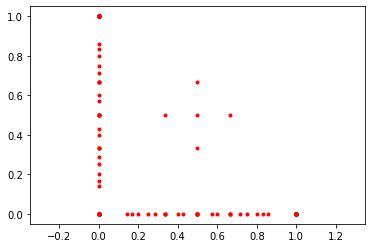

In [52]:
import numpy as np
import satx
import matplotlib.pyplot as plt

dim = 2

satx.engine(bits=6, cnf_path='tmp.cnf')

ps = satx.vector(size=dim, is_rational=True)

assert sum([p ** dim for p in ps]) <= 1

dots = []
while satx.satisfy(solver='./slime', log=False):
    dots.append(np.vectorize(float)(ps))

x, y = zip(*dots)
plt.axis('equal')
plt.plot(x, y, 'r.')
plt.show()

# NP-COMPLETE PROBLEMS

NP-Complete problem, any of a class of computational problems for which no efficient solution algorithm has been found. Many significant computer - science problems belong to this class—e.g., the traveling salesman problem, satisfiability problems, and graph - covering problems.

https://en.wikipedia.org/wiki/NP-completeness

# SATISFIABILITY

Study of boolean functions generally is concerned with the set of truth assignments(assignments of 0 or 1 to each of the variables) that make the function true.

https://en.wikipedia.org/wiki/Boolean_satisfiability_problem

In [53]:
import functools
import operator

import satx

n, m, sat = 10, 24, [[9, -5, 10, -6, 3],
                     [6, 8],
                     [8, 4],
                     [-10, 5],
                     [-9, 8],
                     [-9, -3],
                     [-2, 5],
                     [6, 4],
                     [-2, -1],
                     [7, -2],
                     [-9, 4],
                     [-1, -10],
                     [-3, 4],
                     [7, 5],
                     [6, -3],
                     [-10, 7],
                     [-1, 7],
                     [8, -3],
                     [-2, -10],
                     [-1, 5],
                     [-7, 1, 9, -6, 3],
                     [-9, 6],
                     [-8, 10, -5, -4, 2],
                     [-4, -7, 1, -8, 2]]

satx.engine(bits=1, cnf_path='tmp.cnf')
x = satx.tensor(dimensions=(n,))
assert functools.reduce(operator.iand, (functools.reduce(operator.ior, (x[[abs(lit) - 1]](lit < 0, lit > 0) for lit in cls)) for cls in sat)) == 1
if satx.satisfy(solver='./slime', log=True):
    print('SAT')
    print(' '.join(map(str, [(i + 1) if b else -(i + 1) for i, b in enumerate(x.binary)])) + ' 0')
else:
    print('UNSAT')

c                                         
c   ██████  ██▓     ██▓ ███▄ ▄███▓▓█████  
c ▒██    ▒ ▓██▒    ▓██▒▓██▒▀█▀ ██▒▓█   ▀  
c ░ ▓██▄   ▒██░    ▒██▒▓██    ▓██░▒███    
c   ▒   ██▒▒██░    ░██░▒██    ▒██ ▒▓█  ▄  
c ▒██████▒▒░██████▒░██░▒██▒   ░██▒░▒████▒ 
c ▒ ▒▓▒ ▒ ░░ ▒░▓  ░░▓  ░ ▒░   ░  ░░░ ▒░ ░ 
c ░ ░▒  ░ ░░ ░ ▒  ░ ▒ ░░  ░      ░ ░ ░  ░ 
c ░  ░  ░    ░ ░    ▒ ░░      ░      ░    
c       ░      ░  ░ ░         ░      ░  ░ 
c                                         
c       https://twitter.com/maxtuno       
c                                         
c                [GRAVITY]                
c                                         
c Reduced to 0 vars, 0 cls (grow=0)
c No. effective iterative eliminations: 0
c LS!                
s SATISFIABLE
v -1 -2 3 4 5 6 7 8 9 -10 -11 12 13 -14 -15 -16 -17 -18 -19 -20 -21 -22 -23 -24 -25 -26 -27 -28 -29 30 31 32 -33 34 35 -36 37 38 39 40 -41 42 43 -44 45 46 47 48 49 -50 51 -52 53 54 55 56 57 -58 59 -60 61 62 63 64 65 -66 67 -68 -69 -70 71 72 

# k-CLIQUE

Input: Graph $G$, positive integer $k$

Property: $G$ has a set of mutually adjacent nodes.

https://en.wikipedia.org/wiki/Clique_problem

In [54]:
import satx

# Ths bits of the clique to search
k = 3

# Get the graph, and the dimension for the graph
n, matrix = 5, [(1, 0), (0, 2), (1, 4), (2, 1), (4, 2), (3, 2)]

# Ensure the problem can be represented
satx.engine(bits=k.bit_length(), cnf_path='tmp.cnf')

# Declare an integer of n-bits
bits = satx.integer(bits=n)

# The bits integer have "bits"-active bits, i.e, the clique has "bits"-elements
assert sum(satx.switch(bits, i) for i in range(n)) == k

# This entangles all elements that are joined together
for i in range(n - 1):
    for j in range(i + 1, n):
        if (i, j) not in matrix and (j, i) not in matrix:
            assert satx.switch(bits, i) + satx.switch(bits, j) <= 1

if satx.satisfy(solver='./slime', log=True):
    print(k)
    print(' '.join([str(i) for i in range(n) if not bits.binary[i]]))
else:
    print('Infeasible ...')

c                                         
c   ██████  ██▓     ██▓ ███▄ ▄███▓▓█████  
c ▒██    ▒ ▓██▒    ▓██▒▓██▒▀█▀ ██▒▓█   ▀  
c ░ ▓██▄   ▒██░    ▒██▒▓██    ▓██░▒███    
c   ▒   ██▒▒██░    ░██░▒██    ▒██ ▒▓█  ▄  
c ▒██████▒▒░██████▒░██░▒██▒   ░██▒░▒████▒ 
c ▒ ▒▓▒ ▒ ░░ ▒░▓  ░░▓  ░ ▒░   ░  ░░░ ▒░ ░ 
c ░ ░▒  ░ ░░ ░ ▒  ░ ▒ ░░  ░      ░ ░ ░  ░ 
c ░  ░  ░    ░ ░    ▒ ░░      ░      ░    
c       ░      ░  ░ ░         ░      ░  ░ 
c                                         
c       https://twitter.com/maxtuno       
c                                         
c                [GRAVITY]                
c                                         
c Reduced to 0 vars, 0 cls (grow=0)
c No. effective iterative eliminations: 0
c LS!                
s SATISFIABLE
v -1 -2 -3 -4 5 6 7 8 9 -10 -11 -12 13 -14 15 -16 17 -18 19 20 -21 -22 23 -24 25 -26 -27 28 29 -30 -31 32 -33 34 -35 36 37 -38 -39 -40 -41 -42 -43 -44 45 46 -47 -48 -49 -50 -51 -52 -53 54 55 -56 57 58 -59 -60 -61 -62 63 -64 65 -66 -67 -68 -6

# VERTEX COVER

In the mathematical discipline of graph theory, a vertex cover (sometimes node cover) of a graph is a set of vertices that includes at least one endpoint of every edge of the graph. The problem of finding a minimum vertex cover is a classical optimization problem in computer science and is a typical example of an NP-hard optimization problem that has an approximation algorithm. Its decision version, the vertex cover problem, was one of Karp's 21 NP-complete problems and is therefore a classical NP-complete problem in computational complexity theory. Furthermore, the vertex cover problem is fixed-parameter tractable and a central problem in parameterized complexity theory.

https://en.wikipedia.org/wiki/Vertex_cover

In [55]:
import satx

# Get the graph and dimension, and the bits of the cover.
n, graph, vertex, k = 5, [(1, 0), (0, 2), (1, 4), (2, 1), (4, 2), (3, 2)], [0, 1, 2, 3, 4], 3

# Ensure the problem can be represented
satx.engine(bits=n.bit_length() + 1, cnf_path='tmp.cnf')

# An integer with n-bits to store the indexes for the cover
index = satx.integer(bits=n)

# This entangled the all possible covers
for i, j in graph:
    assert satx.switch(index, vertex.index(i), neg=True) + satx.switch(index, vertex.index(j), neg=True) >= 1

# Ensure the cover has bits k
assert sum(satx.switch(index, vertex.index(i), neg=True) for i in vertex) == k

if satx.satisfy(solver='./slime', log=True):
    opt = sum(index.binary)
    print('p bits {}'.format(opt))
    print(' '.join([str(vertex[i]) for i in range(n) if index.binary[i]]))
else:
    print('Infeasible ...')

c                                         
c   ██████  ██▓     ██▓ ███▄ ▄███▓▓█████  
c ▒██    ▒ ▓██▒    ▓██▒▓██▒▀█▀ ██▒▓█   ▀  
c ░ ▓██▄   ▒██░    ▒██▒▓██    ▓██░▒███    
c   ▒   ██▒▒██░    ░██░▒██    ▒██ ▒▓█  ▄  
c ▒██████▒▒░██████▒░██░▒██▒   ░██▒░▒████▒ 
c ▒ ▒▓▒ ▒ ░░ ▒░▓  ░░▓  ░ ▒░   ░  ░░░ ▒░ ░ 
c ░ ░▒  ░ ░░ ░ ▒  ░ ▒ ░░  ░      ░ ░ ░  ░ 
c ░  ░  ░    ░ ░    ▒ ░░      ░      ░    
c       ░      ░  ░ ░         ░      ░  ░ 
c                                         
c       https://twitter.com/maxtuno       
c                                         
c                [GRAVITY]                
c                                         
c Reduced to 0 vars, 0 cls (grow=0)
c No. effective iterative eliminations: 0
c LS!                
s SATISFIABLE
v -1 2 3 4 -5 -6 7 8 9 10 11 -12 -13 -14 -15 -16 -17 -18 19 -20 -21 -22 23 -24 -25 -26 -27 -28 -29 -30 31 -32 -33 -34 35 -36 -37 -38 -39 40 -41 -42 43 -44 -45 -46 -47 48 -49 50 -51 -52 -53 -54 -55 -56 -57 -58 -59 -60 -61 62 -63 -64 -65 66 -6

# MULTIDIMENSIONAL LATIN SQUARES

In combinatorics and in experimental design, a Latin square is an n × n array filled with n different symbols, each occurring exactly once in each row and exactly once in each column.

https://en.wikipedia.org/wiki/Latin_square

In [56]:
import numpy as np
import satx

n = 6
m = 3

satx.engine(bits=n.bit_length(), cnf_path='tmp.cnf')

Y = satx.vector(size=n ** m)

satx.apply_single(Y, lambda k: k < n)

Y = np.reshape(Y, newshape=(m * [n]))

for i in range(n):
    satx.all_different(Y[i])
    satx.all_different(Y.T[i])
    for j in range(n):
        satx.all_different(Y[i][j])
        satx.all_different(Y.T[i][j])

for idx in satx.hyper_loop(m - 1, n):
    s = Y
    for i in idx:
        s = s[i]
        satx.all_different(s)
        satx.all_different(s.T)

if satx.satisfy(solver='./slime', log=False):
    y = np.vectorize(int)(Y).reshape(m * [n])
    print(y)
else:
    print('Infeasible ...')

[[[4 3 0 1 2 5]
  [3 1 2 4 5 0]
  [5 2 1 0 3 4]
  [0 5 4 2 1 3]
  [1 4 3 5 0 2]
  [2 0 5 3 4 1]]

 [[5 4 1 0 3 2]
  [0 5 4 2 1 3]
  [4 3 0 1 2 5]
  [3 0 2 4 5 1]
  [2 1 5 3 4 0]
  [1 2 3 5 0 4]]

 [[2 1 3 5 4 0]
  [5 4 1 0 3 2]
  [3 0 2 4 5 1]
  [1 2 5 3 0 4]
  [0 3 4 2 1 5]
  [4 5 0 1 2 3]]

 [[3 0 2 4 5 1]
  [1 2 5 3 0 4]
  [2 1 3 5 4 0]
  [5 4 0 1 3 2]
  [4 5 1 0 2 3]
  [0 3 4 2 1 5]]

 [[0 5 4 2 1 3]
  [2 0 3 5 4 1]
  [1 4 5 3 0 2]
  [4 3 1 0 2 5]
  [3 2 0 1 5 4]
  [5 1 2 4 3 0]]

 [[1 2 5 3 0 4]
  [4 3 0 1 2 5]
  [0 5 4 2 1 3]
  [2 1 3 5 4 0]
  [5 0 2 4 3 1]
  [3 4 1 0 5 2]]]


# TRAVELLING SALESMAN PROBLEM WITH HESS ALGORITHM (O. RIVEROS)

https://independent.academia.edu/oarr

The travelling salesman problem asks the following question: "Given a list of cities and the distances between each pair of cities, what is the shortest possible route that visits each city and returns to the origin city?" It is an NP-hard problem in combinatorial optimization, important in operations research and theoretical computer science.

https://en.wikipedia.org/wiki/Travelling_salesman_problem

SAT-X include a full implementation of the HESS black-box algorithm for more advanced examples see here https://github.com/maxtuno/hess

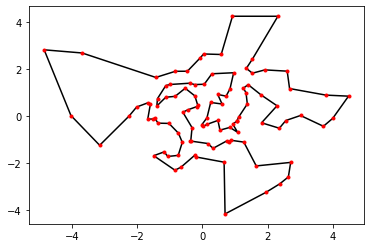

In [57]:
import satx
import numpy as np
import matplotlib.pyplot as plt

n = 100
data = np.random.logistic(size=(n, 2))
seq = satx.hess_sequence(n, oracle=lambda seq: sum(np.linalg.norm(data[seq[i - 1]] - data[seq[i]]) for i in range(n)), fast=False, cycles=1)
x, y = zip(*[data[i] for i in seq + [seq[0]]])
plt.plot(x, y, 'k-')
plt.plot(x, y, 'r.')
plt.show()

47 [5, 3, 8, 6, 7, 4, 0, 9, 1, 2] [7, 9, 3, 5, 2, 5, 2, 6, 4, 4]


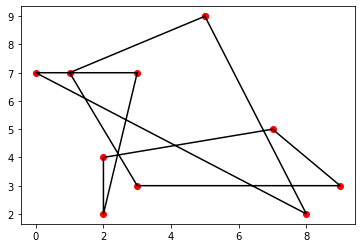

40 [9, 3, 5, 8, 1, 2, 4, 6, 7, 0] [1, 7, 5, 5, 4, 3, 3, 5, 5, 2]


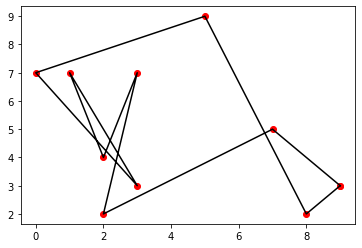

36 [3, 1, 4, 6, 7, 5, 2, 8, 0, 9] [5, 1, 3, 5, 7, 4, 1, 7, 2, 1]


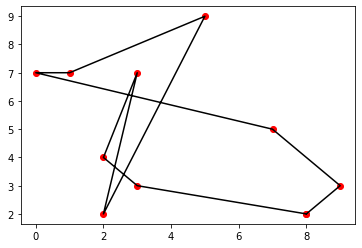

35 [5, 2, 6, 1, 3, 9, 0, 4, 7, 8] [4, 2, 4, 5, 1, 2, 5, 2, 5, 5]


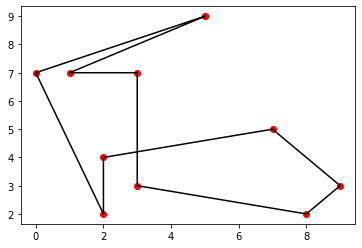

34 [3, 5, 2, 8, 1, 7, 6, 4, 0, 9] [7, 4, 1, 5, 1, 5, 3, 5, 2, 1]


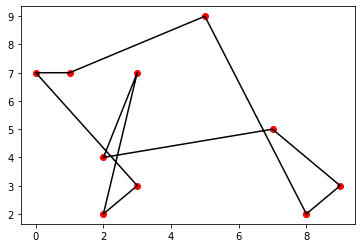

33 [1, 7, 4, 2, 8, 0, 6, 5, 9, 3] [1, 2, 3, 1, 7, 4, 2, 7, 1, 5]


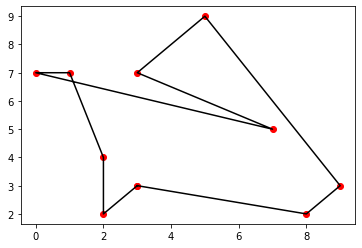

32 [2, 4, 7, 1, 8, 0, 9, 3, 5, 6] [3, 2, 1, 5, 7, 2, 1, 7, 2, 2]


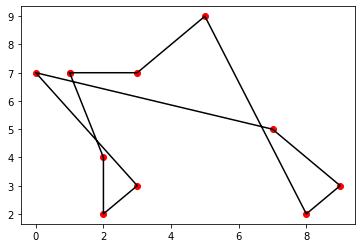

31 [5, 0, 9, 3, 1, 7, 2, 6, 8, 4] [4, 2, 1, 5, 1, 5, 2, 3, 3, 5]


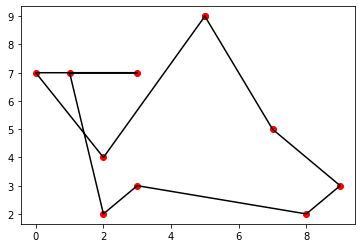

30 [1, 7, 4, 2, 8, 0, 9, 3, 5, 6] [1, 2, 3, 1, 7, 2, 1, 7, 2, 4]


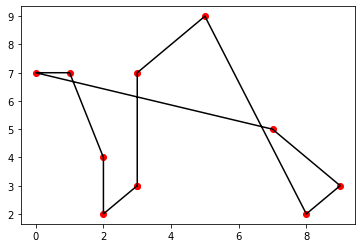

28 [0, 6, 2, 8, 5, 4, 1, 7, 3, 9] [4, 2, 1, 5, 5, 1, 1, 6, 1, 2]


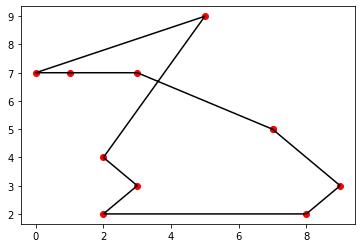

27 [3, 9, 0, 5, 6, 4, 8, 2, 7, 1] [1, 2, 4, 2, 3, 3, 1, 5, 1, 5]


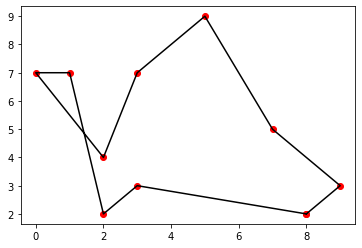

25 [9, 0, 7, 1, 4, 8, 2, 6, 5, 3] [2, 5, 1, 1, 3, 1, 2, 2, 7, 1]


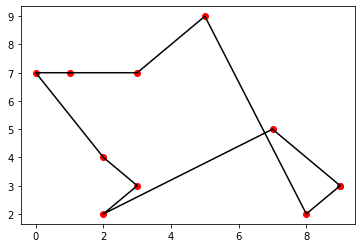

24 [3, 9, 0, 5, 6, 8, 2, 4, 1, 7] [1, 2, 4, 2, 3, 1, 3, 1, 1, 6]


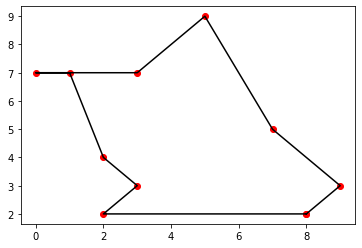

23 [0, 5, 6, 2, 8, 4, 7, 1, 3, 9] [4, 2, 2, 1, 3, 2, 1, 5, 1, 2]


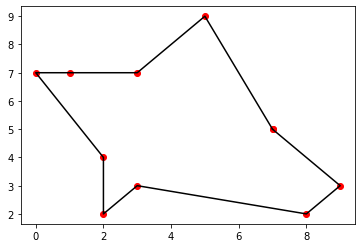

In [58]:
import numpy as np
import satx
import matplotlib.pyplot as plt


n = 10

data = np.random.randint(0, 10, size=(n, 2))
matrix = np.zeros(shape=(n, n))
for i in range(n):
    for j in range(n):
        matrix[i][j] = int(np.linalg.norm(data[i] - data[j]))

opt = 2 ** n - 1
while True:
    satx.engine(bits=int(sum(matrix.flatten())).bit_length() + 1, cnf_path='tmp.cnf')
    x, y = satx.matrix_permutation(matrix.flatten(), n)
    assert sum(y) < opt
    if satx.satisfy(solver='./slime', log=False):
        opt = sum(y)
        print(opt, x, y)

        a, b = zip(*[data[i.value] for i in x + [x[0]]])
        plt.plot(a, b, 'ro')
        plt.plot(a, b, 'k-')
        plt.show('tsp.png')
        plt.close()

        satx.clear(x)
        satx.clear(y)
    else:
        break

# MAGIC SQUARE


In recreational mathematics and combinatorial design, a magic square is a $n\times n$ square grid (where n is the number of cells on each side) filled with distinct positive integers in the range 
${1,2,...,n^{2}}$ such that each cell contains a different integer and the sum of the integers in each row, column and diagonal is equal.

https://en.wikipedia.org/wiki/Magic_square

In [59]:
import satx
import numpy as np

n = 3

satx.engine(bits=5, cnf_path='tmp.cnf')

c = satx.integer()

xs = satx.matrix(dimensions=(n, n))

satx.apply_single(satx.flatten(xs), lambda x: x > 0)
satx.all_different(satx.flatten(xs))

for i in range(n):
    assert sum(xs[i][j] for j in range(n)) == c
for j in range(n):
    assert sum(xs[i][j] for i in range(n)) == c

assert sum(xs[i][i] for i in range(n)) == c
assert sum(xs[i][n - 1 - i] for i in range(n)) == c

if satx.satisfy(solver='./slime', log=True):
    print(c)
    print(np.vectorize(int)(xs))
else:
    print('Infeasible ...')

c                                         
c   ██████  ██▓     ██▓ ███▄ ▄███▓▓█████  
c ▒██    ▒ ▓██▒    ▓██▒▓██▒▀█▀ ██▒▓█   ▀  
c ░ ▓██▄   ▒██░    ▒██▒▓██    ▓██░▒███    
c   ▒   ██▒▒██░    ░██░▒██    ▒██ ▒▓█  ▄  
c ▒██████▒▒░██████▒░██░▒██▒   ░██▒░▒████▒ 
c ▒ ▒▓▒ ▒ ░░ ▒░▓  ░░▓  ░ ▒░   ░  ░░░ ▒░ ░ 
c ░ ░▒  ░ ░░ ░ ▒  ░ ▒ ░░  ░      ░ ░ ░  ░ 
c ░  ░  ░    ░ ░    ▒ ░░      ░      ░    
c       ░      ░  ░ ░         ░      ░  ░ 
c                                         
c       https://twitter.com/maxtuno       
c                                         
c                [GRAVITY]                
c                                         
c Reduced to 250 vars, 1510 cls (grow=0)
c Reduced to 242 vars, 1510 cls (grow=1)
c Reduced to 218 vars, 1450 cls (grow=2)
c No. effective iterative eliminations: 2
c 79.35% (-)                             
c 77.02% (-)                             
c 60.87% (-)                             
c 57.61% (-)                             
c 55.75% (-)          

# SCHUR TRIPLES PROBLEM:

Input: list of 3N distinct positive integers

Question: Is there a partition of the list into N triples $(a_i, b_i, c_i)$ such that $a_i+b_i=c_i$

The condition that all numbers must be distinct makes the problem very interesting and McDiarmid calls it a surprisingly troublesome.

https://cstheory.stackexchange.com/questions/16253/list-of-strongly-np-hard-problems-with-numerical-data

In [60]:
import satx
import numpy as np

bits = 7
size = 3 * 10
triplets = []
while len(triplets) < size:
    a = np.random.randint(1, 2 ** bits)
    b = np.random.randint(1, 2 ** bits)
    if a != b and a not in triplets and b not in triplets and a + b not in triplets:
        triplets += [a, b, a + b]
triplets.sort()
print(triplets)
satx.engine(bits=max(triplets).bit_length(), cnf_path='tmp.cnf')
xs, ys = satx.permutations(triplets, size)
for i in range(0, size, 3):
    assert ys[i] + ys[i + 1] == ys[i + 2]
if satx.satisfy(solver='./slime', log=True):
    for i in range(0, size, 3):
        print('{} == {} + {}'.format(ys[i + 2], ys[i], ys[i + 1]))
else:
    print('Infeasible ...')

[19, 23, 28, 29, 36, 39, 40, 47, 48, 50, 56, 66, 67, 75, 76, 78, 87, 90, 98, 102, 103, 104, 106, 107, 114, 127, 135, 166, 168, 170]
c                                         
c   ██████  ██▓     ██▓ ███▄ ▄███▓▓█████  
c ▒██    ▒ ▓██▒    ▓██▒▓██▒▀█▀ ██▒▓█   ▀  
c ░ ▓██▄   ▒██░    ▒██▒▓██    ▓██░▒███    
c   ▒   ██▒▒██░    ░██░▒██    ▒██ ▒▓█  ▄  
c ▒██████▒▒░██████▒░██░▒██▒   ░██▒░▒████▒ 
c ▒ ▒▓▒ ▒ ░░ ▒░▓  ░░▓  ░ ▒░   ░  ░░░ ▒░ ░ 
c ░ ░▒  ░ ░░ ░ ▒  ░ ▒ ░░  ░      ░ ░ ░  ░ 
c ░  ░  ░    ░ ░    ▒ ░░      ░      ░    
c       ░      ░  ░ ░         ░      ░  ░ 
c                                         
c       https://twitter.com/maxtuno       
c                                         
c                [GRAVITY]                
c                                         
c Reduced to 2380 vars, 33050 cls (grow=0)
c No. effective iterative eliminations: 0
c 22.62% (-)                             
c 22.61% (-)                             
c 22.61% (-)                             
c 22.61% (-)

# SUBSET SUM PROBLEM

In this problem, there is a given set with some integer elements. And another some value is also provided, we have to find a subset of the given set whose sum is the same as the given sum value.

https://en.wikipedia.org/wiki/Subset_sum_problem

In [61]:
import satx
import numpy as np

universe = np.random.randint(1, 1000, size=32)
t = np.random.randint(min(universe), sum(universe))

print(t, universe)

satx.engine(bits=t.bit_length(), cnf_path='tmp.cnf')

bits, subset = satx.subsets(universe)

assert sum(subset) == t

if satx.satisfy(solver='./slime', log=True):
    solution = [universe[i] for i in range(len(universe)) if bits.binary[i]]
    print(sum(solution), solution)
else:
    print('Infeasible ...')

575 [486 335 436 367 598 400 221 862  76 798 794 920 557 455  61 738 276 210
  34 678 185 370 941 436 306 432 302 126 312 371 743 692]
c                                         
c   ██████  ██▓     ██▓ ███▄ ▄███▓▓█████  
c ▒██    ▒ ▓██▒    ▓██▒▓██▒▀█▀ ██▒▓█   ▀  
c ░ ▓██▄   ▒██░    ▒██▒▓██    ▓██░▒███    
c   ▒   ██▒▒██░    ░██░▒██    ▒██ ▒▓█  ▄  
c ▒██████▒▒░██████▒░██░▒██▒   ░██▒░▒████▒ 
c ▒ ▒▓▒ ▒ ░░ ▒░▓  ░░▓  ░ ▒░   ░  ░░░ ▒░ ░ 
c ░ ░▒  ░ ░░ ░ ▒  ░ ▒ ░░  ░      ░ ░ ░  ░ 
c ░  ░  ░    ░ ░    ▒ ░░      ░      ░    
c       ░      ░  ░ ░         ░      ░  ░ 
c                                         
c       https://twitter.com/maxtuno       
c                                         
c                [GRAVITY]                
c                                         
c Reduced to 614 vars, 2672 cls (grow=0)
c Reduced to 583 vars, 2670 cls (grow=1)
c Reduced to 552 vars, 2563 cls (grow=2)
c Reduced to 530 vars, 2607 cls (grow=3)
c Reduced to 520 vars, 2582 cls (grow=4)
c Reduced to 51

# PERMUTATION RECONSTRUCTION FROM DIFFERENCES

https://arxiv.org/pdf/1410.6396.pdf

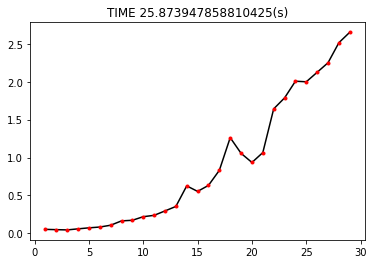

In [62]:
import satx
import numpy as np
import matplotlib.pyplot as plt

def gen_instance(n):
    import random
    y = list(range(1, n + 1))
    random.shuffle(y)
    return [abs(y[i + 1] - y[i]) for i in range(n - 1)]


import time
start = time.time()
times = []
sizes = []
for n in range(1, 30):
    diffs = gen_instance(n)
    ini = time.time()
    satx.engine(bits=n.bit_length() + 1, cnf_path='tmp.cnf')
    x = satx.vector(size=n)
    satx.all_different(x)
    satx.apply_single(x, lambda a: 1 <= a <= n)
    for i in range(n - 1):
        assert satx.index(i, diffs) == satx.one_of([x[i + 1] - x[i], x[i] - x[i + 1]])
    if satx.satisfy(solver='./slime', log=False):
        end = time.time() - ini
        xx = [abs(x[i + 1] - x[i]) for i in range(n - 1)]
        if xx == diffs:
            sizes.append(n)
            times.append(end)
        else:
            raise Exception('Error!')
    else:
        raise Exception('Error!')
end = time.time() - start
plt.title('TIME {}(s)'.format(end))
plt.plot(sizes, times, 'k-')
plt.plot(sizes, times, 'r.')
plt.show()
plt.close()

# HAMILTONIAN CYCLE PROBLEM

In the mathematical field of graph theory, a Hamiltonian path (or traceable path) is a path in an undirected or directed graph that visits each vertex exactly once. A Hamiltonian cycle (or Hamiltonian circuit) is a Hamiltonian path that is a cycle. Determining whether such paths and cycles exist in graphs is the Hamiltonian path problem, which is NP-complete.

https://en.wikipedia.org/wiki/Hamiltonian_path

In [63]:
import sys

import satx
import numpy as np


n = 10
M = np.random.randint(0, 2, size=(n, n))

print(M)

satx.engine(bits=(n ** 2).bit_length(), cnf_path='tmp.cnf')
ids, elements = satx.matrix_permutation((1 - M).flatten(), n)

assert sum(elements) == 0

if satx.satisfy(solver='./slime', log=True):
    for i in ids:
        for j in ids:
            sys.stdout.write('{} '.format(M[i.value][j.value]))
        sys.stdout.write('\n') 
    sys.stdout.write('\n')
else:
    print('Infeasible ...')

[[0 0 1 0 1 0 1 1 0 0]
 [1 1 1 1 0 1 1 1 1 1]
 [1 1 0 1 1 1 0 1 1 1]
 [0 0 1 1 0 1 1 1 0 1]
 [0 1 0 1 1 0 0 0 1 0]
 [1 0 1 0 1 0 0 0 1 0]
 [0 1 1 0 1 1 1 0 0 0]
 [0 0 1 0 1 0 1 1 1 0]
 [1 0 0 1 0 1 0 1 0 0]
 [0 1 1 0 0 1 1 1 1 0]]
c                                         
c   ██████  ██▓     ██▓ ███▄ ▄███▓▓█████  
c ▒██    ▒ ▓██▒    ▓██▒▓██▒▀█▀ ██▒▓█   ▀  
c ░ ▓██▄   ▒██░    ▒██▒▓██    ▓██░▒███    
c   ▒   ██▒▒██░    ░██░▒██    ▒██ ▒▓█  ▄  
c ▒██████▒▒░██████▒░██░▒██▒   ░██▒░▒████▒ 
c ▒ ▒▓▒ ▒ ░░ ▒░▓  ░░▓  ░ ▒░   ░  ░░░ ▒░ ░ 
c ░ ░▒  ░ ░░ ░ ▒  ░ ▒ ░░  ░      ░ ░ ░  ░ 
c ░  ░  ░    ░ ░    ▒ ░░      ░      ░    
c       ░      ░  ░ ░         ░      ░  ░ 
c                                         
c       https://twitter.com/maxtuno       
c                                         
c                [GRAVITY]                
c                                         
c Reduced to 905 vars, 20239 cls (grow=0)
c Reduced to 834 vars, 20200 cls (grow=1)
c Reduced to 800 vars, 20190 cls (grow=2

# BIN PACKING PROBLEM

In the bin packing problem, items of different volumes must be packed into a finite number of bins or containers each of a fixed given volume in a way that minimizes the number of bins used. In computational complexity theory, it is a combinatorial NP-hard problem. The decision problem (deciding if items will fit into a specified number of bins) is NP-complete.

https://en.wikipedia.org/wiki/Bin_packing_problem

In [64]:
import satx
import numpy as np

capacity = 50
size = 50
elements = sorted([np.random.randint(1, capacity // 2 - 1) for _ in range(size)], reverse=True)
print(capacity)
print(elements)
bins = int(np.ceil(sum(elements) / capacity))
while True:
    satx.engine(bits=capacity.bit_length() + 1, cnf_path='tmp.cnf')
    slots = satx.vector(bits=len(elements), size=bins)
    for i in range(len(elements)):
        assert sum(satx.switch(slot, i) for slot in slots) == 1
    for slot in slots:
        assert sum(satx.switch(slot, i) * elements[i] for i in range(len(elements))) <= capacity
    if satx.satisfy(solver='./slime', log=False):
        print('Solution for {} bins...'.format(bins))
        for slot in slots:
            print(''.join(['_' if boolean else '#' for boolean in slot.binary]))
        for slot in slots:
            sub = [item for i, item in enumerate(elements) if not slot.binary[i]]
            print(sum(sub), sub)
        break
    else:
        print('No solution for {} bins...'.format(bins))
        bins += 1

50
[23, 22, 21, 20, 20, 19, 19, 19, 19, 17, 17, 17, 16, 16, 15, 15, 15, 14, 14, 14, 13, 12, 11, 11, 11, 11, 10, 10, 10, 9, 9, 8, 7, 7, 7, 6, 6, 5, 5, 5, 4, 4, 4, 4, 3, 2, 2, 2, 1, 1]
Solution for 12 bins...
___#___________#________________#_____#_____#_____
____________________#_______#__#_#________#___####
_____#________#_#_________________________________
___________#_#_____________#_________________#____
_______#_____________________#_____###_#__________
__#_________#_________#___________________________
_________#________#_______#_____________#_________
____#___#_______________#_________________________
______#____________#______________#________#______
_________________#_____#_________________#________
__________#__________#___#____#___________________
##________________________________________________
50 [20, 15, 7, 5, 3]
48 [13, 10, 8, 7, 4, 2, 2, 1, 1]
49 [19, 15, 15]
45 [17, 16, 10, 2]
50 [19, 9, 6, 6, 5, 5]
48 [21, 16, 11]
45 [17, 14, 10, 4]
50 [20, 19, 11]
44 [19, 14, 7, 4]


# ZERO-ONE INTEGER PROGRAMMING DEFINITION

Zero-one integer programming (which can also be written as 0-1 integer programming) is a mathematical method of using a series of binary, yes (1) and no (0) answers to arrive at a solution when there are two mutually exclusive options.

https://en.wikipedia.org/wiki/Integer_programming

In [65]:
import satx
import numpy as np

n, m = 10, 5
cc = np.random.randint(0, 1000, size=(n, m))
d = np.dot(cc, np.random.randint(0, 2, size=(m,)))
print(cc)
print(d)
satx.engine(bits=int(np.sum(cc)).bit_length(), cnf_path='tmp.cnf')
xs = satx.vector(size=m)
satx.all_binaries(xs)
assert (np.dot(cc, xs) == d).all()
if satx.satisfy(solver='./slime', log=True):
    print(xs)
    print('Proof:')
    print(np.dot(cc, xs))
else:
    print('Infeasible...')

[[461 428 463 317 480]
 [723 449 662 541 954]
 [752 313  45 474 389]
 [ 70 520 883 424 609]
 [260 376  92 962 274]
 [221 947 288 999 167]
 [800 893  79 620 312]
 [323 460 948  67 886]
 [232 823 285 529 289]
 [890  24 974 985 983]]
[480 954 389 609 274 167 312 886 289 983]
c                                         
c   ██████  ██▓     ██▓ ███▄ ▄███▓▓█████  
c ▒██    ▒ ▓██▒    ▓██▒▓██▒▀█▀ ██▒▓█   ▀  
c ░ ▓██▄   ▒██░    ▒██▒▓██    ▓██░▒███    
c   ▒   ██▒▒██░    ░██░▒██    ▒██ ▒▓█  ▄  
c ▒██████▒▒░██████▒░██░▒██▒   ░██▒░▒████▒ 
c ▒ ▒▓▒ ▒ ░░ ▒░▓  ░░▓  ░ ▒░   ░  ░░░ ▒░ ░ 
c ░ ░▒  ░ ░░ ░ ▒  ░ ▒ ░░  ░      ░ ░ ░  ░ 
c ░  ░  ░    ░ ░    ▒ ░░      ░      ░    
c       ░      ░  ░ ░         ░      ░  ░ 
c                                         
c       https://twitter.com/maxtuno       
c                                         
c                [GRAVITY]                
c                                         
c Reduced to 0 vars, 0 cls (grow=0)
c No. effective iterative eliminations: 0
c LS

# n-QUEENS COMPLETION PROBLEM

The n- Queens Completion problem is a variant, dating to 1850, in which some queens are already placed and the solver is asked to place the rest, if possi- ble. ... The n-Queens problem is to place n chess queens on an n by n chessboard so that no two queens are on the same row, column or diagonal.

https://www.ijcai.org/Proceedings/2018/0794.pdf

In [66]:
import satx


def completion(n, m, seed):
    import random
    """
    http://www.csplib.org/Problems/prob079/data/queens-gen-fast.py.html
    """
    random.seed(seed)

    d1 = [0 for _ in range(2 * n - 1)]
    d2 = [0 for _ in range(2 * n - 1)]

    valid_rows = [i for i in range(n)]
    valid_cols = [j for j in range(n)]

    def no_attack(r, c):
        return d1[r + c] == 0 and d2[r - c + n - 1] == 0

    pc = []
    queens_left = n

    for attempt in range(n * n):
        i = random.randrange(queens_left)
        j = random.randrange(queens_left)
        r = valid_rows[i]
        c = valid_cols[j]
        if no_attack(r, c):
            pc.append([r, c])
            d1[r + c] = 1
            d2[r - c + n - 1] = 1
            valid_rows[i] = valid_rows[queens_left - 1]
            valid_cols[j] = valid_cols[queens_left - 1]
            queens_left -= 1
            if len(pc) == m:
                return [[x + 1, y + 1] for x, y in pc]

def show(pc):
    table = ''
    for i in range(1, n + 1):
        table += ''
        for j in range(1, n + 1):
            if [i, j] not in pc:
                table += '. '
            else:
                table += 'Q '
        table += '\n'
    print(table)
    print('# seed = {}'.format(seed))
    
n, m, seed = 30, 15, 0
placed_queens = completion(n, m, seed)
show(placed_queens)
satx.engine(bits=n.bit_length() + 1, cnf_path='tmp.cnf')
qs = satx.vector(size=n)
for (a, b) in placed_queens:
    assert qs[a - 1] == b - 1
satx.apply_single(qs, lambda x: x < n)
satx.apply_dual(qs, lambda x, y: x != y)
satx.apply_dual([qs[i] + i for i in range(n)], lambda x, y: x != y)
satx.apply_dual([qs[i] - i for i in range(n)], lambda x, y: x != y)
if satx.satisfy(solver='./slime', log=True):
    for i in range(n):
        print(''.join(['Q ' if qs[i] == j else '. ' for j in range(n)]))
    print('')
else:
    print('Infeasible ...')

. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 
. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 
. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 
. . Q . . . . . . . . . . . . . . . . . . . . . . . . . . . 
. . . . . . . . . Q . . . . . . . . . . . . . . . . . . . . 
. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 
. . . . . . . . . . . . . . . . . . . . . . . . . . Q . . . 
. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 
. . . . . . . . . . . . . . . . Q . . . . . . . . . . . . . 
. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 
. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 
. . . . . . . . . . . . . . . . . . Q . . . . . . . . . . . 
. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 
. Q . . . . . . . . . . . . . . . . . . . . . . . . . . . . 
. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 
. . . . . . . . . . . . . . . . . . . . . . . . . . . . . Q 
. . . . . . . . . . . . 

# PARTITION PROBLEM

n number theory and computer science, the partition problem, or number partitioning, is the task of deciding whether a given multiset $S$ of positive integers can be partitioned into two subsets $S_1$ and $S_2$ such that the sum of the numbers in $S_1$ equals the sum of the numbers in $S_2$.

https://en.wikipedia.org/wiki/Partition_problem

In [72]:
import numpy as np
import satx

size = 20

data = np.random.randint(1000, size=size)

print(data)

satx.engine(bits=int(sum(data)).bit_length(), cnf_path='tmp.cnf')

T, sub, com = satx.subsets(data, complement=True)

assert sum(sub) == sum(com)

if satx.satisfy(solver='./slime', log=True):
    sub_ = [data[i] for i in range(size) if T.binary[i]]
    com_ = [data[i] for i in range(size) if not T.binary[i]]
    print(sum(sub_), sub_)
    print(sum(com_), com_)
else:
    print('Infeasible ...')

[969 664 544 292 550 533 894 407  38 599 926 276 434 331 836 410   3 509
  29 744]
c                                         
c   ██████  ██▓     ██▓ ███▄ ▄███▓▓█████  
c ▒██    ▒ ▓██▒    ▓██▒▓██▒▀█▀ ██▒▓█   ▀  
c ░ ▓██▄   ▒██░    ▒██▒▓██    ▓██░▒███    
c   ▒   ██▒▒██░    ░██░▒██    ▒██ ▒▓█  ▄  
c ▒██████▒▒░██████▒░██░▒██▒   ░██▒░▒████▒ 
c ▒ ▒▓▒ ▒ ░░ ▒░▓  ░░▓  ░ ▒░   ░  ░░░ ▒░ ░ 
c ░ ░▒  ░ ░░ ░ ▒  ░ ▒ ░░  ░      ░ ░ ░  ░ 
c ░  ░  ░    ░ ░    ▒ ░░      ░      ░    
c       ░      ░  ░ ░         ░      ░  ░ 
c                                         
c       https://twitter.com/maxtuno       
c                                         
c                [GRAVITY]                
c                                         
c Reduced to 1020 vars, 4298 cls (grow=0)
c Reduced to 976 vars, 4298 cls (grow=1)
c Reduced to 968 vars, 4282 cls (grow=2)
c Reduced to 885 vars, 4448 cls (grow=3)
c Reduced to 881 vars, 4429 cls (grow=4)
c Reduced to 867 vars, 4485 cls (grow=5)
c Reduced to 725 vars, 45

# SUDOKU 

is a logic-based, combinatorial number-placement puzzle. The objective is to fill a 9×9 grid with digits so that each column, each row, and each of the nine 3×3 subgrids that compose the grid (also called "boxes", "blocks", or "regions") contain all of the digits from 1 to 9. The puzzle setter provides a partially completed grid, which for a well-posed puzzle has a single solution.

Completed games are always an example of a Latin square which include an additional constraint on the contents of individual regions. For example, the same single integer may not appear twice in the same row, column, or any of the nine 3×3 subregions of the 9×9 playing board.

https://en.wikipedia.org/wiki/Sudoku

In [68]:
import numpy as np
import satx


def expand_line(line):
    return line[0] + line[5:9].join([line[1:5] * (base - 1)] * base) + line[9:13]


def show(board):
    import string
    line0 = expand_line('╔═══╤═══╦═══╗')
    line1 = expand_line('║ . │ . ║ . ║')
    line2 = expand_line('╟───┼───╫───╢')
    line3 = expand_line('╠═══╪═══╬═══╣')
    line4 = expand_line('╚═══╧═══╩═══╝')

    symbol = ' ' + string.printable.replace(' ', '')
    nums = [[''] + [symbol[n] for n in row] for row in board]
    print(line0)
    for r in range(1, side + 1):
        print("".join(n + s for n, s in zip(nums[r - 1], line1.split('.'))))
        print([line2, line3, line4][(r % side == 0) + (r % base == 0)])


def generate(base):
    # pattern for a baseline valid solution
    def pattern(r, c):
        return (base * (r % base) + r // base + c) % side

    # randomize rows, columns and numbers (of valid base pattern)
    from random import sample

    def shuffle(s):
        return sample(s, len(s))

    rBase = range(base)
    rows = [g * base + r for g in shuffle(rBase) for r in shuffle(rBase)]
    cols = [g * base + c for g in shuffle(rBase) for c in shuffle(rBase)]
    nums = shuffle(range(1, base * base + 1))

    # produce board using randomized baseline pattern
    board = [[nums[pattern(r, c)] for c in cols] for r in rows]

    squares = side * side
    empties = (squares * 3) // 4
    for p in map(int, sample(range(squares), empties)):
        board[p // side][p % side] = 0

    show(board)
    return board


base = 4
side = base * base

puzzle = np.asarray(generate(base))

satx.engine(bits=side.bit_length(), cnf_path='tmp.cnf')

board = np.asarray(satx.matrix(dimensions=(side, side)))
satx.apply_single(board.flatten(), lambda x: 1 <= x <= side)

for i in range(side):
    for j in range(side):
        if puzzle[i][j]:
            assert board[i][j] == puzzle[i][j]

for c, r in zip(board, board.T):
    satx.all_different(c)
    satx.all_different(r)

for i in range(base):
    for j in range(base):
        satx.all_different(board[i * base:(i + 1) * base, j * base:(j + 1) * base].flatten())

if satx.satisfy(solver='./slime', log=True):
    show(np.vectorize(int)(board))


╔═══╤═══╤═══╤═══╦═══╤═══╤═══╤═══╦═══╤═══╤═══╤═══╦═══╤═══╤═══╤═══╗
║   │ 1 │ 4 │   ║   │   │   │ 2 ║   │   │   │   ║ 5 │ 9 │   │   ║
╟───┼───┼───┼───╫───┼───┼───┼───╫───┼───┼───┼───╫───┼───┼───┼───╢
║   │   │   │ b ║   │   │ a │   ║   │   │ 2 │ 8 ║   │   │   │   ║
╟───┼───┼───┼───╫───┼───┼───┼───╫───┼───┼───┼───╫───┼───┼───┼───╢
║ 8 │   │   │ d ║   │   │ f │   ║   │   │   │   ║   │   │   │   ║
╟───┼───┼───┼───╫───┼───┼───┼───╫───┼───┼───┼───╫───┼───┼───┼───╢
║   │   │ 3 │   ║   │   │ b │ 5 ║   │   │ 4 │   ║ 2 │   │   │   ║
╠═══╪═══╪═══╪═══╬═══╪═══╪═══╪═══╬═══╪═══╪═══╪═══╬═══╪═══╪═══╪═══╣
║   │ 0 │   │   ║ 4 │   │   │   ║   │ 1 │ d │   ║   │   │   │   ║
╟───┼───┼───┼───╫───┼───┼───┼───╫───┼───┼───┼───╫───┼───┼───┼───╢
║ 2 │   │   │   ║   │   │   │   ║ 0 │   │   │   ║   │   │   │   ║
╟───┼───┼───┼───╫───┼───┼───┼───╫───┼───┼───┼───╫───┼───┼───┼───╢
║ 4 │   │ a │   ║   │   │   │ d ║   │   │   │   ║   │   │   │   ║
╟───┼───┼───┼───╫───┼───┼───┼───╫───┼───┼───┼───╫───┼───┼───┼───╢
║   │   │ 

# MAXIMUM CONSTRAINED PARTITITON

---



---



http://www.csc.kth.se/~viggo/wwwcompendium/node152.html

In [71]:
import random

import satx

bits = 10
n = 2 * 100

D = [random.randint(1, 2 ** bits) for _ in range(n)]

print('D   : {}'.format(D))

satx.engine(bits=sum(D).bit_length(), cnf_path='tmp.cnf')

bins, sub, com = satx.subsets(D, n // 2, complement=True)

assert sum(sub) == sum(com)

if satx.satisfy(solver='./slime', log=True):
    sub = [D[i] for i in range(n) if bins.binary[i]]
    com = [D[i] for i in range(n) if not bins.binary[i]]
    print(sum(sub), len(sub), sub)
    print(sum(com), len(com), com)
    print('\n')
else:
    print('Infeasible ...')

D   : [588, 685, 114, 74, 986, 856, 289, 1008, 168, 311, 723, 843, 73, 955, 792, 940, 97, 208, 965, 311, 42, 67, 272, 664, 216, 710, 400, 786, 1005, 228, 124, 957, 692, 255, 607, 261, 794, 602, 249, 388, 79, 803, 911, 761, 391, 933, 731, 155, 92, 82, 996, 524, 55, 443, 471, 192, 861, 626, 233, 299, 873, 865, 173, 215, 852, 129, 204, 851, 320, 63, 915, 883, 855, 62, 1018, 665, 518, 161, 722, 145, 249, 736, 61, 708, 713, 365, 21, 473, 750, 145, 294, 426, 7, 420, 253, 15, 601, 756, 51, 477, 291, 383, 930, 231, 977, 706, 529, 267, 58, 427, 742, 687, 970, 600, 607, 670, 377, 166, 211, 631, 321, 772, 301, 257, 457, 647, 498, 485, 377, 597, 763, 860, 95, 271, 43, 807, 160, 150, 271, 861, 614, 854, 292, 865, 611, 727, 174, 509, 911, 757, 119, 771, 837, 18, 855, 657, 904, 418, 762, 601, 965, 187, 380, 223, 568, 230, 316, 914, 817, 380, 864, 885, 358, 508, 929, 698, 292, 728, 948, 178, 990, 418, 604, 4, 920, 947, 16, 448, 612, 235, 617, 320, 869, 966, 190, 1020, 476, 831, 574, 45]
c             

# PARALLEL OPTIMIZATION - MIN-MAX SUM SUBSET CARDINALITY

# GRIEWANK FUNCTION

Ref: https://www.sfu.ca/~ssurjano/griewank.html

In [70]:
import numpy
import satx


class GriewankFunctionHESS:

    def __init__(self, a, b):
        self.a = a
        self.b = b

    def oracle(self, xs):
        return numpy.sum([(x ** 2) / 4000 for x in xs]) - numpy.prod([numpy.cos(x / numpy.sqrt(i + 1)) for i, x in enumerate(xs)]) + 1

    def f(self, i, j, xs):
        xs[i], xs[j] = self.a + xs[i] / self.b, self.a + xs[j] / self.b
        xs[i:j] = xs[i:j][::-1]

    def g(self, i, j, xs):
        xs[i:j] = xs[i:j][::-1]
        xs[i], xs[j] = self.b * xs[i] - self.a, self.b * xs[j] - self.a

    def log(self, top, opt):
        print(top)

    def run(self, n):
        xs = numpy.random.randint(-600, 600, size=n)
        return satx.hess_abstract(xs, self.oracle, self.f, self.g, self.log, target=0)


n = 100
gf = GriewankFunctionHESS(n ** -2, n ** 2)
print(gf.run(n))

3230.6842500000007
3230.5402500000005
3143.5152500000004
3142.7312500000007
3127.8472500000007
3122.7350000000006
3108.5740000000005
3071.1317500000005
3035.9755000000005
3018.2865
2971.4142500000003
2938.29025
2935.3742500000003
2877.052
2825.068
2812.072
2726.5157500000005
2711.0155000000004
2682.28525
2678.0602500000005
2676.2112500000003
2672.7302500000005
2613.6812500000005
2605.491
2521.9700000000003
2460.4660000000003
2457.91575
2372.3595000000005
2346.59925
2330.343
2263.5207500000006
2237.7605000000003
2237.71825
2234.962
2210.78175
2201.6615
2143.3392500000004
2140.09025
2120.2092500000003
2107.6652500000005
2023.275
1983.4747499999999
1976.1644999999999
1976.0082499999999
1907.6259999999997
1894.28575
1894.0454999999997
1891.2365
1863.18025
1856.2912499999998
1785.0022499999998
1700.0299999999997
1683.9009999999998
1598.6369999999997
1568.1867499999998
1487.2464999999997
1474.81425
1410.0439999999999
1404.19175
1376.96675
1366.76575
1283.5334999999995
1222.5244999999995
1216